In [ ]:
!pip install shap -q


import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import joblib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning

from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

# Import filters to remove unnecessary warnings
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, mean_absolute_error
import shap

In [ ]:
# Load the data
df = pd.read_excel("Hydrogen storage dataset.xlsx")

# I manually deleted the first two rows in the excel sheet and printed the columns

# Check if the data contains null values
print(df.isna().sum())

Material name                         0
Average crystal size (nm)             0
Crystalinity index (%)                0
 BET surface area (m²/g)              0
Pore volume (cm³/g)                   0
Temperature (K)                       0
Pressure (bar)                        0
Hydrogen uptake/adsorption (wt%)    116
Hydrogen desorption (wt%)           388
dtype: int64


In [ ]:
df.dtypes

,0
Material name,object
Average crystal size (nm),float64
Crystalinity index (%),float64
BET surface area (m²/g),float64
Pore volume (cm³/g),float64
Temperature (K),float64
Pressure (bar),object
Hydrogen uptake/adsorption (wt%),float64
Hydrogen desorption (wt%),float64


In [ ]:
# convert Pressure (bar) into float type
df['Pressure (bar)'] = df['Pressure (bar)'].astype(float)

In [ ]:
# check to be sure all type values are correct
df.dtypes

,0
Material name,object
Average crystal size (nm),float64
Crystalinity index (%),float64
BET surface area (m²/g),float64
Pore volume (cm³/g),float64
Temperature (K),float64
Pressure (bar),float64
Hydrogen uptake/adsorption (wt%),float64
Hydrogen desorption (wt%),float64


In [ ]:
# Assuming your dataset is stored in a DataFrame called 'df'

# One-hot encode the first column
df_encoded = pd.get_dummies(df, columns=[df.columns[0]])

print(df_encoded)

     Average crystal size (nm)  Crystalinity index (%)  \
0                     3.780644               82.394903   
1                     3.780644               82.394903   
2                     3.780644               82.394903   
3                     3.780644               82.394903   
4                     3.780644               82.394903   
..                         ...                     ...   
534                   3.969572               36.381961   
535                   3.969572               36.381961   
536                   3.969572               36.381961   
537                   3.969572               36.381961   
538                   3.969572               36.381961   

      BET surface area (m²/g)  Pore volume (cm³/g)  Temperature (K)  \
0                       125.2                1.018           298.00   
1                       125.2                1.018           298.00   
2                       125.2                1.018           298.00   
3                  

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Iterate through each column
for col in df_encoded.columns:
    # Check if the column is numeric
    if df_encoded[col].dtype.name.startswith('float') or df_encoded[col].dtype.name.startswith('int'):
        # Fill missing values with the median
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mean())
    else:
        # Fill missing values with the mode
        df_encoded[col] = df_encoded[col].fillna(df_encoded[col].mode().iloc[0])  # Handle multiple modes by selecting the first

In [ ]:
# Check if the data contains null values again
print(df_encoded.isna().sum())

Average crystal size (nm)                                                                       0
Crystalinity index (%)                                                                          0
 BET surface area (m²/g)                                                                        0
Pore volume (cm³/g)                                                                             0
Temperature (K)                                                                                 0
Pressure (bar)                                                                                  0
Hydrogen uptake/adsorption (wt%)                                                                0
Hydrogen desorption (wt%)                                                                       0
Material name_CNT decorated with Ni at mass ratio of 10                                         0
Material name_CNT decorated with Ni at mass ratio of 2                                          0
Material name_CNT de

In [ ]:
# Check for duplicates in the entire dataset
duplicates = df_encoded.duplicated()
# If there are any duplicates, the 'duplicates' variable will contain True for those rows
if duplicates.any():
    # Get the rows with duplicates
    duplicate_rows = df[duplicates]
else:
    print("No duplicates found in the dataset.")

No duplicates found in the dataset.


In [ ]:
# drop duplicates
data = df_encoded.drop_duplicates()

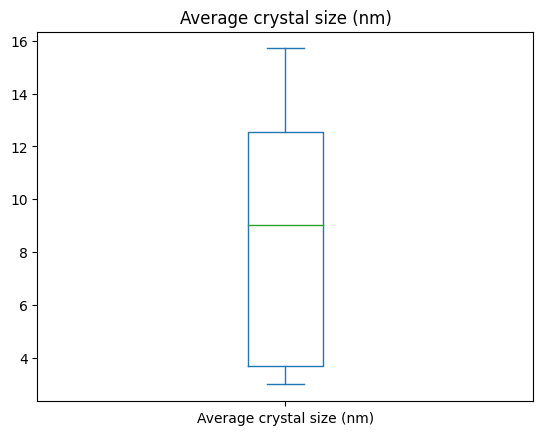

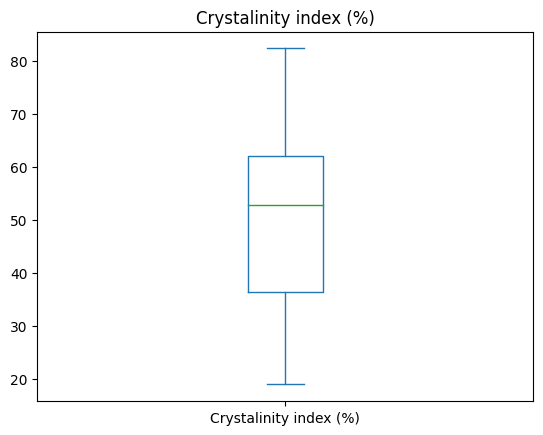

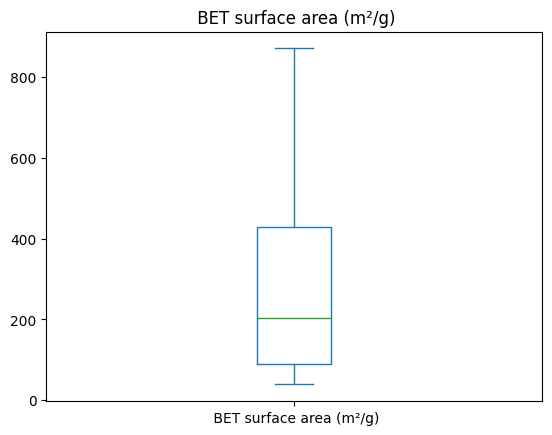

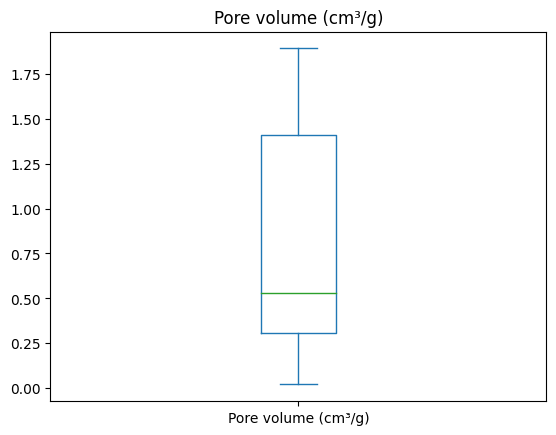

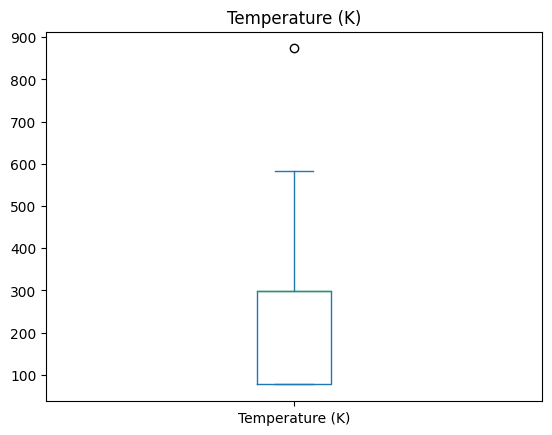

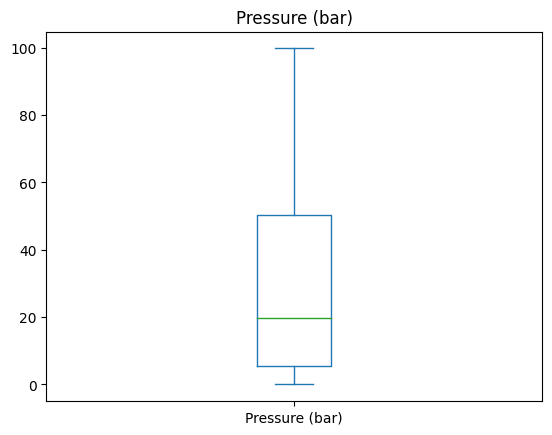

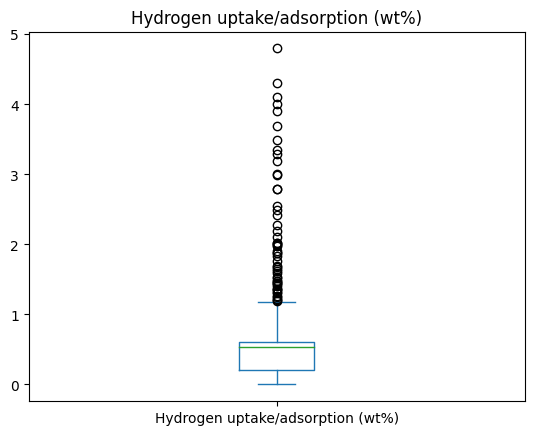

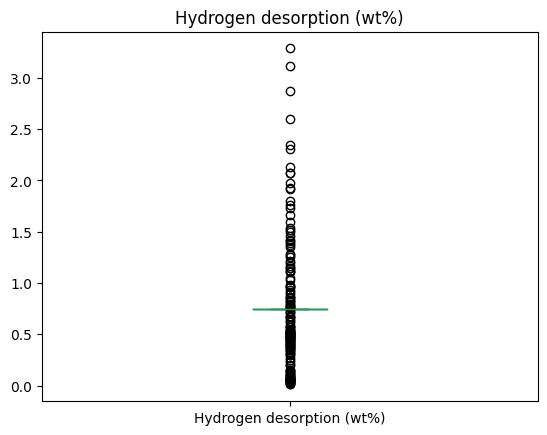

In [ ]:
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Create box plots for each numeric column, handling potential NaN values
for col in numeric_columns:
    # Check for NaN values and handle them appropriately
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())  # Replace NaN with column mean (adjust as needed)

    # Create box plot
    data[col].plot(kind='box', title=col)
    plt.show()

Because there are too many outliers in the Hydrogen desorption column, we are not deleting any outliers. Deleting that column of data wil result in too much data being deleted


In [ ]:
data.describe()  # Summary statistics for numerical columns

,Average crystal size (nm),Crystalinity index (%),BET surface area (m²/g),Pore volume (cm³/g),Temperature (K),Pressure (bar),Hydrogen uptake/adsorption (wt%),Hydrogen desorption (wt%)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,8.166266,49.162962,258.195065,0.838367,246.267191,30.892001,0.601873,0.750073
std,4.560454,16.764251,214.466418,0.609617,152.823071,28.904974,0.652448,0.349933
min,2.977754,18.900143,39.200000,0.021000,77.000000,0.000000,0.000000,0.011229
25%,3.669600,36.381961,89.060000,0.307000,77.000000,5.629100,0.212346,0.750073
50%,9.032235,52.881608,204.000000,0.530000,298.000000,19.740500,0.528395,0.750073
75%,12.543453,62.089987,428.000000,1.410000,298.150000,50.329800,0.601873,0.750073
max,15.712170,82.394903,870.000000,1.891000,873.150000,99.751700,4.797770,3.286860


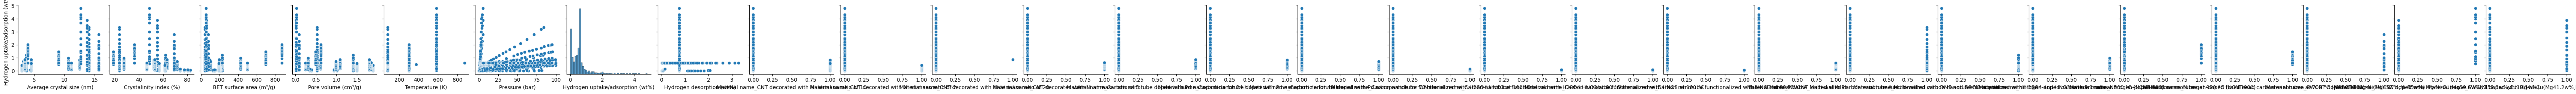

In [ ]:
sns.pairplot(data, x_vars=data, y_vars=['Hydrogen uptake/adsorption (wt%)'])

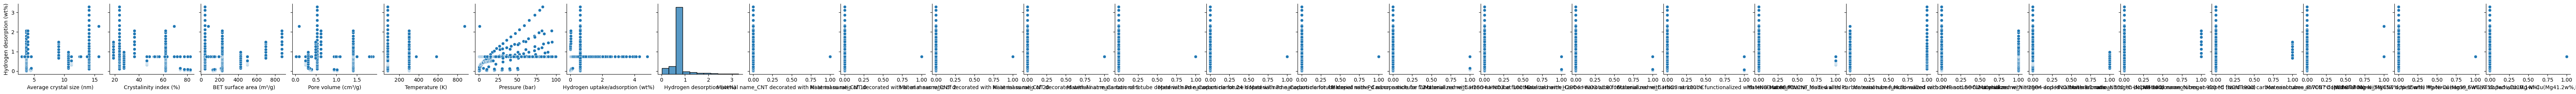

In [ ]:
sns.pairplot(data, x_vars=data, y_vars=['Hydrogen desorption (wt%)'])

Separate the data into the target and features two times for the two targets


In [ ]:
X_uptake = data.drop('Hydrogen uptake/adsorption (wt%)',axis=1)

# also drop the other target variable
X_uptake = data.drop('Hydrogen desorption (wt%)',axis=1)

y_uptake = data['Hydrogen uptake/adsorption (wt%)']
# Select only numerical columns (excluding 'object' type)
X_uptake = X_uptake.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train_uptake, X_test_uptake, y_train_uptake, y_test_uptake = train_test_split(X_uptake, y_uptake, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
}

# Train and evaluate each model
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_uptake, y_train_uptake)
    y_pred = model.predict(X_test_uptake)
    mse = mean_squared_error(y_test_uptake, y_pred)
    r2 = r2_score(y_test_uptake, y_pred)
    mae = mean_absolute_error(y_test_uptake, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


Random Forest Mean Squared Error: 0.000, R² Score: 0.999, MAE: 0.005
 
Decision Tree Mean Squared Error: 0.000, R² Score: 0.998, MAE: 0.008
 
XGBoost Mean Squared Error: 0.001, R² Score: 0.995, MAE: 0.010
 


In [ ]:
X_desorption = data.drop('Hydrogen desorption (wt%)',axis=1)

# also drop the other target variable
X_desorption = data.drop('Hydrogen uptake/adsorption (wt%)',axis=1)

y_desorption = data['Hydrogen desorption (wt%)']
# Select only numerical columns (excluding 'object' type)
X_desorption = X_desorption.select_dtypes(exclude=['object'])

# Split the dataset into training and testing sets
X_train_desorption, X_test_desorption, y_train_desorption, y_test_desorption = train_test_split(X_desorption, y_desorption, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_desorption, y_train_desorption)
    y_pred = model.predict(X_test_desorption)
    mse = mean_squared_error(y_test_desorption, y_pred)
    r2 = r2_score(y_test_desorption, y_pred)
    mae = mean_absolute_error(y_test_desorption, y_pred)
    print(f"{name} Mean Squared Error: {mse:.3f}, R² Score: {r2:.3f}, MAE: {mae:.3f}")
    print(' ')


Random Forest Mean Squared Error: 0.001, R² Score: 0.993, MAE: 0.006
 
Decision Tree Mean Squared Error: 0.000, R² Score: 0.998, MAE: 0.006
 
XGBoost Mean Squared Error: 0.001, R² Score: 0.993, MAE: 0.010
 


Based on the R2, MSE and MAE, the most accurate model for Hydrogen uptake/adsorption (wt%) is Random Forest Mean. The most accurate model for Hydrogen desorption (wt%) is the Decision Tree.

In [ ]:
# Define function to plot SHAP model

def plot_local_shap(X_train, X_test, y_train, y_test, model,id):
    from shap import Explainer, Explanation
    from shap import waterfall_plot

    # Train the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Fits the explainer
    explainer = shap.Explainer(model)
    # Calculates the SHAP values - It takes some time
    shap_values = explainer(X_train)
    #shap_values = explainer.shap_values(X_train)
    shap.plots.waterfall(shap_values[id])

def plot_feature_importance(X_train, X_test, y_train, y_test, x, y, model):
    # Train and evaluate the model
    model.fit(X_train, y_train)  # Train with scaled data
    # Feature Importance plot
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()

    fig = go.Figure(go.Bar(
        x=feature_importance[sorted_idx],
        y=x.columns[sorted_idx],
        orientation='h'
    ))
    fig.update_layout(title="Extra Trees Regressor - Feature Importance")
    fig.update_layout(height=600, width=1000, title_text="Feature Importance and SHAP Summary")
    fig.show()

In [ ]:
plot_feature_importance(X_train_uptake, X_test_uptake, y_train_uptake, y_test_uptake, X_uptake, y_uptake, RandomForestRegressor())

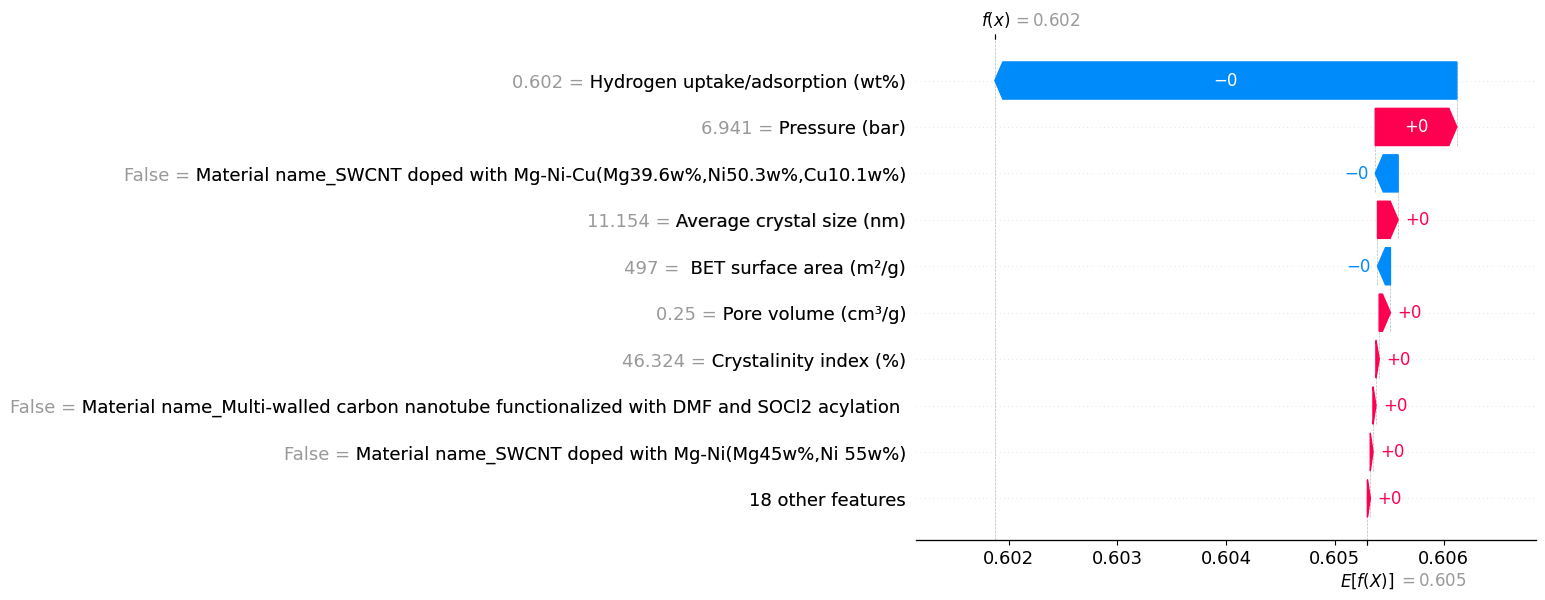

In [ ]:
plot_local_shap(X_train_uptake, X_test_uptake, y_train_uptake, y_test_uptake, RandomForestRegressor(), 3)

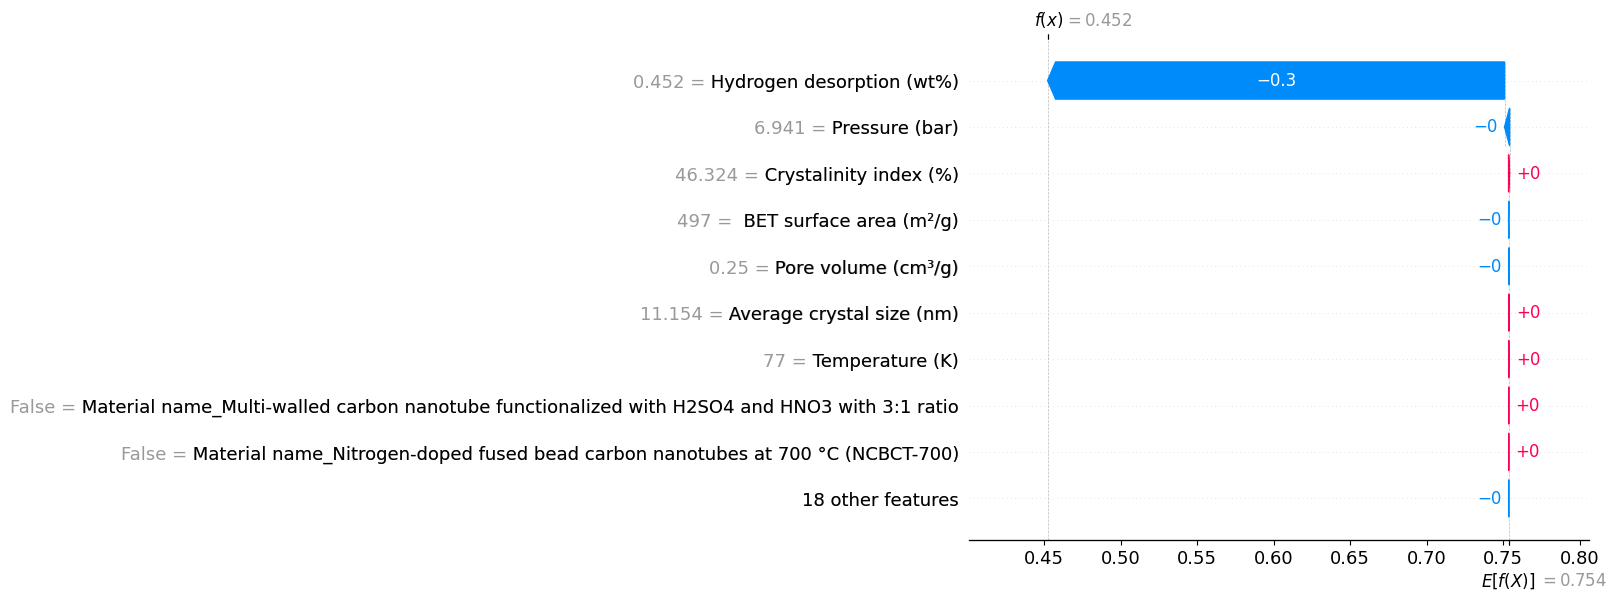

In [ ]:
plot_local_shap(X_train_desorption, X_test_desorption, y_train_desorption, y_test_desorption, DecisionTreeRegressor(), 3)

I swear I'm dropping and the target values in the features being analyzed, however it never seems to reflect that in the SHAP being displayed. I'd love to know what features influence the targets the most (take the absolute value of the SHAP value), but I can't figure out what is wrong.